## predicting units of sales per total amount spent on advertisement using Machine Learning algorithms.
<b> Previously, we explored is there a relationship between units of sales per total amount spent on advertisement using Machine Learning algorithms.
    
    
<b> In this article, I am using Marketing dataset as "Advertising.csv". I’ll discuss a project where I worked on predicting units of sales per each advertising channel (TV, Radio, Newspaper) spent on advertisement using Machine Learning algorithms. The algorithms included Multiple linear regression.
    
    
    

## Step - 1 : Business Problem Understanding
- <b> What is the relationship between each advertising channel (TV, Radio, Newspaper) and sales ?
    
- <b> On the basis of this data, how should they spend advertising money in the future ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between ads and sales ?
   2. How strong is that relationship ?
   3. Which ad types contribute to sales ?
   4. What is the effect of each ad type of sales ?
   5. Given ad spending, can sales be predicted ?

<b> importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_csv("Advertising.csv")

# Display the first 5 lines using the head() method.
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


### 2.2 Data Understanding
<b> Let’s have a look at data dimensionality.

In [3]:
df.shape

(200, 4)

<b> From the output, we can see that the table contains 200 rows and 4 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


<b> int64 is the data type of our features. We see that all features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 200 observations, the same number of rows we saw before with shape.
    
    
<b> Here 4 variables are there, all variables are numeric. The sales variable in units and the TV, radio and newspaper variables are in dollars.

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)
<b> On the basis of this data, how should they spend advertising money in the future ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between ads and sales ?
   2. How strong is that relationship ?
   3. Which ad types contribute to sales ?
   4. What is the effect of each ad type of sales ?
   5. Given ad spending, can sales be predicted ?
    
    

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


<b> Here I am using Pairplot to visualizes given data to find the relationship between them.

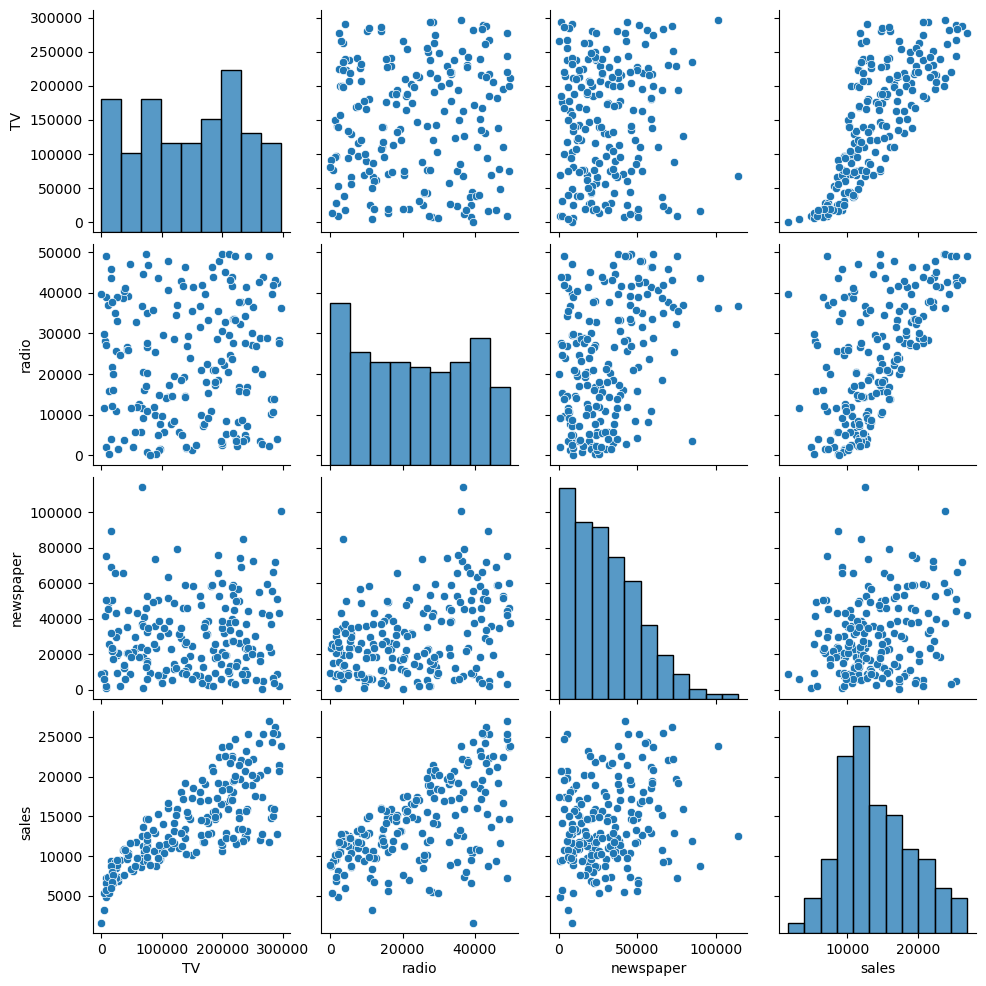

In [6]:
# plot the pairplot.
sns.pairplot(df)

# Display all figures.
plt.show()

<b> By observing the scatter plots and histograms, we made an assumption of the relation between sales and (TV + radio + newspaper) is linear.
    
    
<b> The corr() method finds the correlation of each column in a DataFrame.

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- <b> The relationship between dependent (sales) and independent (TV, radio, newspaper) variables should be high. The higher relationship gives the stronger the correlation and accuracy.
    
- <b> The relationship between any two independent variables should be low, it will gives the low accuracy.

<b> The above matrix shows the strong correlation of the dependent (sales) and independent (TV, radio, newspaper) variables. And the weak (low) correlation between any two independent variables. 

### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [8]:
# Check the missing values records.
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<b> In the above, we can see that there is no missing values.
    
    
<b> Now checking the Duplicate records :

In [9]:
df.duplicated().sum()

0

<b> In the above, we can see that there is no duplicate values.
    
    
<b> Wrong data and wrong format data is also not there.

### 3.3 Data Wrangling
<b> Here all variables are numeric, so encoding is not required.

### 3.4 Train/Test Split
<b> Creating independent variables ("TV", "radio", "newspaper") as "x" variable and dependent variable "sales" as "y" variable.

In [10]:
# Create x and y variables.
x = df[["TV", "radio", "newspaper"]]    # independent variables
y = df["sales"]                         # dependent variable

<b> In the above, I have created x variable with 3 independent (input) variables and y variable with 1 dependent (output) variable.

In [11]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of x_train, x_test, y_train, y_test

In [12]:
x_train.shape, x_test.shape

((140, 3), (60, 3))

In [13]:
y_train.shape, y_test.shape

((140,), (60,))

## Step - 4 : Modelling (Model1)
**Multiple Linear Regression -** Linear regression include multiple input features. This is done by least squares method
    
        ŷ = B0 + B1*x1 + B2*x2 + ...+ Bn*xn
        
Each x represents a different features, and each feature has its own coefficient.
    
Now in this case, calculating a line of best fit that links x to y, the linear equation is given by :

        ŷ = B0 + B1("TV") + B2("radio") + B3("newspaper")

In [14]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# save (initialize) the model as "model"
model = LinearRegression()

# Train the model using training sets
model.fit(x_train, y_train)


LinearRegression()

<b> Now we can get the coefficient and intercept values from the model using attributes like coef_ and intercept_ :

In [15]:
# print the intercept (B0)
model.intercept_

2708.949092515906

In [16]:
# print the regression coefficient or coef (B1)
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

<b> From these two values, we can calculate best fit line that links x to y, so the linear equation become as:

       ŷ = 2708.94 + 0.044("TV") + 0.19("radio") + 0.0068("newspaper")
    
    
<b> I have calculated the linear equation for best fit that links x to y.

## Predicting the results 
- <b> We have built the linear regression model. Now it is time to predict the results.
    
    
<b> Predicting the test set results

In [17]:
# Predict on the train data set.
train_prediction = model.predict(x_train)

# Predict on the test data set.
test_prediction = model.predict(x_test)


## Step - 5 : Evaluation (Evaluate Model Performance)
<b> I have built the linear regression model and use it to predict the results. Now, it is time to evaluate the model performance. We want to understand the outcome of our model and we want to know whether the performance is acceptable or not. For regression problems, there are several ways to evaluate the model performane. These are listed below :

   -  Root Mean Square Error (RMSE)
   -  Coefficient of Determination (R2_score)
    
    
<b> I have described these measures in following sections : 
        

<b> Root Mean Square Error (RMSE) :

In [18]:
# import the mean_squared_error class from sklearn.metrics library
from sklearn.metrics import mean_squared_error

# RMSE for test data and print it.
print("RMSE for test data:", np.sqrt(mean_squared_error(y_test, test_prediction)))

# RMSE for train data and print it.
print("RMSE for train data:", np.sqrt(mean_squared_error(y_train, train_prediction)))

RMSE for test data: 1948.537204344638
RMSE for train data: 1574.5968305905444


<b> Coefficient of Determination (R2_score) :

In [19]:
# import the r2_score class from sklearn.metrics library
from sklearn.metrics import r2_score

# Coefficient of Determination (R2_score) for test data and print it.
print("R2 for test data:", r2_score(y_test, test_prediction))

# Coefficient of Determination (R2_score) for train data and print it.
print("R2 for train data:", r2_score(y_train, train_prediction))

R2 for test data: 0.8609466508230369
R2 for train data: 0.9055159502227753


In [20]:
# Test R-Square
model.score(x_test, y_test)

0.8609466508230369

In [21]:
# Train R-Square
model.score(x_train, y_train)

0.9055159502227753

<b> Training set and testing set performances are comparable. From the above we conclude that, we have got good accuracy on train and test data sets. We got an accuracy of 86.09% with this model.

## Checklist :
<b> For any Supervised Machine Learning Alorithm, we need to follow these checklist :
    
   1. Check whether model has Overfitting or Underfitting problem.
   2. Is Test Accuracy = Cross Validation Score
   3. Check Assumptions (If it is linear regression only)
   4. Check model meets the business problem requirements.
   5. Finally, save the model and share to the deployment team.

### 1. Is model has Overfitting or Underfitting problem.
    
    
- <b> From the above, we can see that the training set accuracy is 90.55% and testing set accuracy is 86.09%. Training set and testing set performances are comparable. From the above we conclude that, we have got good accuracy on train and test data sets, hence Overfitting or Underfitting problem is not there in this data set.

### 2. Is Test Accuracy = Cross Validation Score

In [22]:
# Calculate the Cross Validation Score.

# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and store it in "score" object.
score = cross_val_score(model, x, y, cv=5)

# Print the result.
print(score)

# calculate the mean of the score.
cv_score = score.mean()

# Print the mean of the score.
print(cv_score)


[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
0.8871063495438435


In the above, first I have imported cross_val_score class from sklearn.model_selection library, then applied the cross_val_score class.


   - Here "model" is a estimator/instantiate of LinearRegression.
   - x is a independent (input) variable.
   - y is a dependent (output) variable.
   - cv is determines the cross-validation splitting strategy. Here I have passed splitting strategy (cv=5).
   
   
It returns the 5 score's (accuracy) by cross-validation. Then i have applied the mean() on that result and printed that mean result on console. Here Cross Validation Score is 0.8871


<b> from the above, i have conclude that the  Test Accuracy almost equal's to Cross Validation Score.

### 3. Check for Assumptions 
<b> These are some formal checks while building a Linear Regression model, which ensures to get the best possible result from the given dataset.
    
    a) Linearity of Errors
    b) Normality of Errors
    c) Equal Variance of Errors (Homoscadesicity)
    d) Autocorrelation or Variables Significance (Independence of Errors)
    e) Multicollinearity

#### a) Linearity of Errors :
- <b> Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a scatter plot to check the relation of observed values (y_test) Vs fitted values (Errors or Residuals).
    

In [23]:
# Calculate the Errors or Residuals.
residuals = y_test - test_prediction

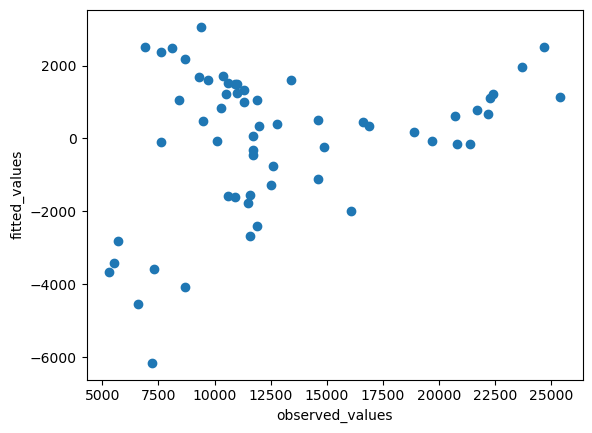

In [33]:
# visualize the relationship between the residual vs observed values using scatterplot.

# Draw the scatter plot.
plt.scatter(y_test, residuals)

# Set the x-label name.
plt.xlabel("observed_values")

# Set the y-label name.
plt.ylabel("fitted_values")

# Display all figures.
plt.show()

<b> By looking at the plots we can see that it's not linear shape. Here actual test value and predicted values are not same, more residuals are there.

#### b) Normality of Errors :
- <b> Checking the normality of the errors (residuals).

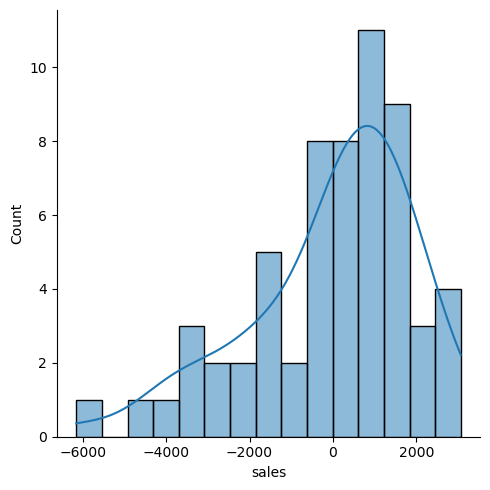

In [24]:
# Draw the histogram plot on residuals Vs count by using seaborn.diplot().

# Draw the histogram plot.
sns.displot(residuals, bins=15, kde=True)

# Display all figures.
plt.show()

<b> By looking at the plots we can see that the residuals are not normally distributed for the number of test points, its showing left skewed distribution.

#### c) Equal Variance of Errors (Homoscadesicity) :
- Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

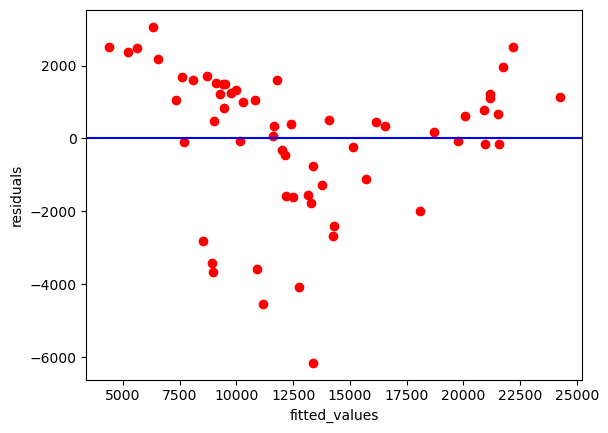

In [25]:
# Draw the scatter plot on residuals Vs test_prediction by using scatter().

# Draw the scatter plot.
plt.scatter(test_prediction, residuals, c='r')

# Add a horizontal line across the Axes where y=0.
plt.axhline(y=0, color='blue')

# Set the x-label name.
plt.xlabel("fitted_values")

# Set the y-label name.
plt.ylabel("residuals")

# Display all figures.
plt.show()

<b> from the above plot, we can see that the residuals are non-constant variance, it is known as heteroscedasticity.

#### d) Autocorrelation or Variables Significance (Independence of Errors) :
- Checking the residuals are independent.or not. Let's check this based on Ordinary Least Squares (OLS) Using StatsModels.

In [26]:
# import the ols class from statsmodels.formula.api library
from statsmodels.formula.api import ols

# create our formula and pass it through to the OLS methods 
# pass the data=df and use fit() to fit the linear model.
# Store the result in "model2" object.
model2 = ols("y~x", data=df).fit()

# evaluate how the model performed and print it.
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        13:18:21   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.8894    311.908      9.422      0.000    2323.762    3554.016
x[0]           0.0458      0.001     32.809      0.000       0.043       0.049
x[1]           0.1885      0.009     21.893      0.000       0.172       0.206
x[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above, first i have imported the ols class from statsmodels.formula.api library, then created a formula as "y~x" by assuming linear regression model, pass the 'df' DataFrame and used fit() to fit (calculate) the linear model, same result stored in the 'model2' object and printed (evaluate) how the model performed.


Taking a look at this, we see a number of different types of values. From the above I required only one P>|t| based on that i will take a decision on Independence of Errors. We will go into detail about this one major observation below :


- P>|t| is the P-value for the null hypothesis that the coefficient is equal to zero. If the value is less than the confidence level, usually 0.05, it means that the null hypothesis can be rejected and there is a significant relationship between the coefficient value and the parameter.


- Here hypothesis testing comes into picture, formulate the Null Hypotheses (Ho) and Alternative Hypotheses (H1). :

    Ho : There is no relationship between input variables and output variable (and thus B1 equals to zero (B1=0))
    
    H1 : There is relationship between input variables and output variable (and thus B1 not equals to zero (B1≠0))
    
    
- Based on the p-value, conclude the Hypothesis test.

     - If p-value ≤ alpha (p low Null go)    <---> (Reject Ho)
     - If p-value > alpha (p high Null fly)  <---> (Do not Reject Ho)
     

<b> In the above, we can see that P>|t| (probability of x[0] and x[1]) is less than the confidence level, i.e. p-value (0.000) < confidence level (0.05) and P>|t| (probability of x[2]) is greater than the confidence level, i.e. p-value (0.860) > confidence level (0.05), hence the residuals or error terms are not independent of each other (variables are not significant).

<b> Hence variables are not significant, checking whether data has any influential values by using Influence index plots.
    
### Influence Plot :
- a set of techniques that allows one to determine the degree to which specific data points affect the overall result of a statistical procedure.
    
- Influence plots show the (externally) studentized residuals vs. the leverage of each observation.
    
    
- Dividing a statistic (residuals) by a sample standard deviation is called "studentizing".
    
  studentizing = Residual/standard deviation of residuals
    
    
- Leverage is a measure of how far away the independent variable values of an observation are from those of the other observations. High-leverage points are outliers with respect to the independent variables.

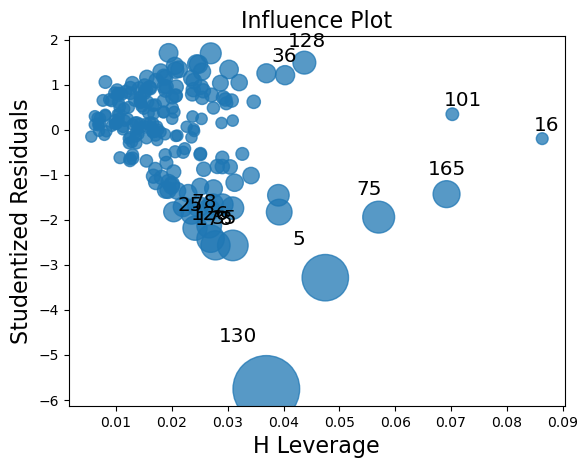

In [41]:
# import statsmodels.api as sm
import statsmodels.api as sm

# Draw influence plot.
sm.graphics.influence_plot(model2)

<b> As you can see there are a few big blue points, those values are considered as high influence values. Here 130, 5, 75, 165 16, 101, 128, 36 these numbers are index numbers of that influence values.
    
<b> Now we are dropping the those high influence values. Index [130, 5, 75, 165, 16, 101, 128, 36] are showing high influence, so we can exclude that entire rows.

In [27]:
# Drop the influence values and store the result in "df_new" object.
df_new = df.drop(df.index[[130, 5, 75, 165, 16, 101, 128, 36]], axis=0)

# print the "df_new" object.
df_new

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


<b> In the above, we can see that the table contains 192 rows and 4 columns. I have dropped the those high influence values.
    
    
<b> Now, once again checking the residuals are independent.or not.  Let's check this based on Ordinary Least Squares (OLS) Using StatsModels.

In [28]:
# import the ols class from statsmodels.formula.api library
from statsmodels.formula.api import ols

# create our formula and pass it through to the OLS methods 
# pass the data=df_new and use fit() to fit the linear model.
# Store the result in "lm" object.
lm = ols(formula="sales ~ TV + radio + newspaper", data=df_new).fit()

# evaluate how the model performed and print it.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     669.8
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          4.51e-100
Time:                        13:19:17   Log-Likelihood:                -1672.6
No. Observations:                 192   AIC:                             3353.
Df Residuals:                     188   BIC:                             3366.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3088.3210    281.063     10.988      0.000    2533.879    3642.763
TV             0.0435      0.001     33.945      0.000       0.041       0.046
radio          0.1910      0.008     23.880      0.000       0.175       0.207
newspaper      0.0058      0.006      0.957      0.340      -0.006       0.018
==============================================================================
Omnibus:                       18.476   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.147
Skew:                          -0.805   Prob(JB):                     2.56e-05
Kurtosis:                       3.223   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b> In the above, we can see that P>|t| (probability of x[0] and x[1]) is less than the confidence level, i.e. p-value (0.000) < confidence level (0.05) and P>|t| (probability of x[2]) is greater than the confidence level, i.e. p-value (0.340) > confidence level (0.05), hence the residuals or error terms are not independent of each other (variables are not significant).
    
    
<b> After dropping high influence values, still residuals or error terms are not independent of each other (variables are not significant).
    
    

#### e) Multicollinearity :
Multicollinearity happens when the independent variables are highly correlated with each other. There should be less or no multicollinearity in the given dataset.

Checking the multicollinearity by using Variance Inflation Factor (VIF)

<b> Variance Inflation Factor (VIF) :
- Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.
    
    
- It is obtained by regressing each independent variable, say X on the remaining independent variables (say Y and Z) and checking how much of it (of X) is explained by these variables.
    
    
- VIF approach chooses each feature and regresses it against the remaining features. It is calculated by using the given formula :

    VIF = 1 / 1 - R^2
    
    
   - If VIF value <=4, it implies no multicollinearity.
   - If VIF value>=10, it implies significant multicollinearity

In [29]:
# Calculating VIF's values of independent variables.

# import the ols class from statsmodels.formula.api library
from statsmodels.formula.api import ols

# Calculate TV regressing on the radio and newspaper variables.
# Store the result as "vif_TV".
rsq_TV = ols("TV ~ radio + newspaper", data=df).fit().rsquared
vif_TV = 1/(1 - rsq_TV )

# Calculate radio regressing on the TV and newspaper variables.
# Store the result as "vif_radio".
rsq_radio = ols("radio ~ TV + newspaper", data=df).fit().rsquared
vif_radio = 1/(1 - rsq_radio )

# Calculate newspaper regressing on the TV and radio variables.
# Store the result as "vif_newspaper".
rsq_newspaper = ols("newspaper ~ TV + radio", data=df).fit().rsquared
vif_newspaper = 1/(1 - rsq_newspaper )

# Store VIF values in a "vif_frame" DataFrame.
vif_frame = pd.DataFrame({"variables":["TV", "radio", "newspaper"], 
                             "VIF":[vif_TV, vif_radio, vif_newspaper ]})

# Print the "vif_frame" DataFrame.
vif_frame

,variables,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


<b> From the above, we can say that the Multicollinearity problem is not there in this dataset.

<b> Now we are plotting Added Variable Plots or Partial Regression Plots (AV Plot), which displays the relationship between a dependent and independent variables conditional on other independent varibales. It will identify the effects of the individual data values on the estimation of a coefficient and investigate violations of underlying assumptions such as linearity and homoscedasticity.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


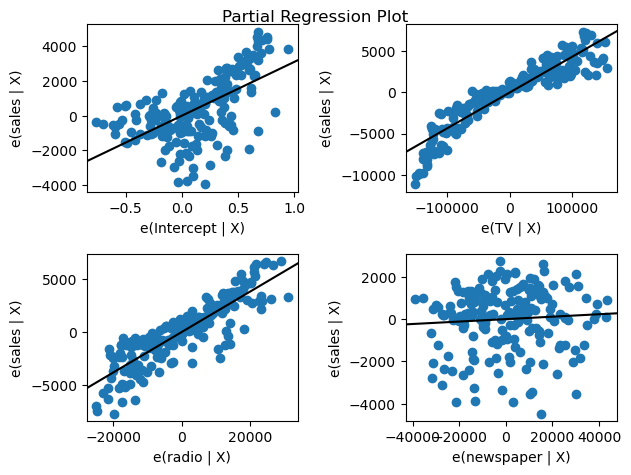

In [30]:
# Draw the Partial Regression Plots (AV Plot) by using statsmodels.api library.

# import statsmodels.api as sm
import statsmodels.api as sm

# Draw influence plot.
sm.graphics.plot_partregress_grid(lm)

<b> From the above Partial Regression Plots (AV Plot), We observe a positive relationship between sales and TV as well as between sales and radio, the relationship seems to be linear in both cases. But the relationship between sales and newspaper not showing any significance.

<b> From the above these statistical investigations, i have canclude that sales and newspaper not showing any significance. So now I am re-building new model for this dataset with only two independent variables (i.e. TV and radio).
    
    
## Re-building the Model with two independent variables (i.e. TV and radio).
## Model2

In [37]:
# Create x and y variables.
x = df[["TV", "radio"]]        # independent variables
y = df["sales"]                # dependent variable


# Train/Test Split

# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# save (initialize) the model as "model11"
model11 = LinearRegression()

# Fit the data or train the model using training sets.
model11.fit(x_train, y_train)

# print the intercept (B0)
print("Intercept:", model11.intercept_)

# print the regression coefficient or coef (B1, B2)
print("Slope (B1, B2):", model11.coef_)

# Predict on the train data set.
train_prediction = model11.predict(x_train)

# Predict on the test data set.
test_prediction1 = model11.predict(x_test)

# Model evaluation.
# Train R-Square
train_r2 = model11.score(x_train, y_train)

# print the Train R-Square
print("Train R-Square:", train_r2 )

# Test R-Square
test_r2 = model11.score(x_test, y_test)

# print the Test R-Square
print("Test R-Square:", test_r2 )

Intercept: 2837.617236905173
Slope (B1, B2): [0.04407736 0.20260566]
Train R-Square: 0.9048377867980043
Test R-Square: 0.8656253548947075


<b> Training set and testing set performances are comparable. From the above we conclude that, we have got good accuracy on train and test data sets. We got an accuracy of 86.56% with this model.

## Checklist :
<b> For any Supervised Machine Learning Alorithm, we need to follow these checklist :
    
   1. Check whether model has Overfitting or Underfitting problem.
   2. Is Test Accuracy = Cross Validation Score
   3. Check Assumptions (If it is linear regression only)
   4. Check model meets the business problem requirements.
   5. Finally, save the model and share to the deployment team.

### 1. Is model has Overfitting or Underfitting problem.
    
    
- <b> From the above, we can see that the training set accuracy is 90.48% and testing set accuracy is 86.56%. Training set and testing set performances are comparable. From the above we conclude that, we have got good accuracy on train and test data sets, hence Overfitting or Underfitting problem is not there in this data set.

### 2. Is Test Accuracy = Cross Validation Score

In [33]:
# Calculate the Cross Validation Score.

# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and store it in "score" object.
score = cross_val_score(model11, x, y, cv=5)

# Print the result.
print(score)

# calculate the mean of the score.
cv_score = score.mean()

# Print the mean of the score.
print(cv_score)


[0.88116273 0.91814589 0.92984129 0.82185938 0.8954055 ]
0.889282957306453


<b> <b> from the above, i have conclude that the  Test Accuracy almost equal's to Cross Validation Score.

### 3. Check for Assumptions 
<b> These are some formal checks while building a Linear Regression model, which ensures to get the best possible result from the given dataset.
    
    a) Linearity of Errors
    b) Normality of Errors
    c) Equal Variance of Errors (Homoscadesicity)
    d) Autocorrelation or Variables Significance (Independence of Errors)
    e) Multicollinearity

#### a) Linearity of Errors :
- <b> Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a scatter plot to check the relation of observed values (y_test) Vs fitted values (Errors or Residuals).

In [38]:
# Calculate the Errors or Residuals.
residuals1 = y_test - test_prediction1

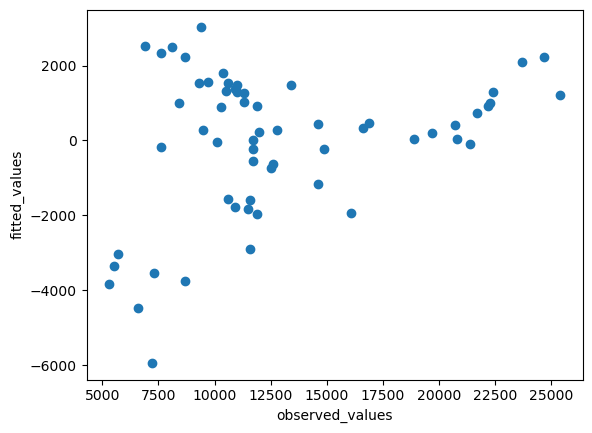

In [39]:
# visualize the relationship between the residual vs observed values using scatterplot.

# Draw the scatter plot.
plt.scatter(y_test, residuals1)

# Set the x-label name.
plt.xlabel("observed_values")

# Set the y-label name.
plt.ylabel("fitted_values")

# Display all figures.
plt.show()

<b> By looking at the plots we can see that it's not linear shape. Here actual test value and predicted values are not same, more residuals are there.

#### b) Normality of Errors :
- <b> Checking the normality of the errors (residuals).

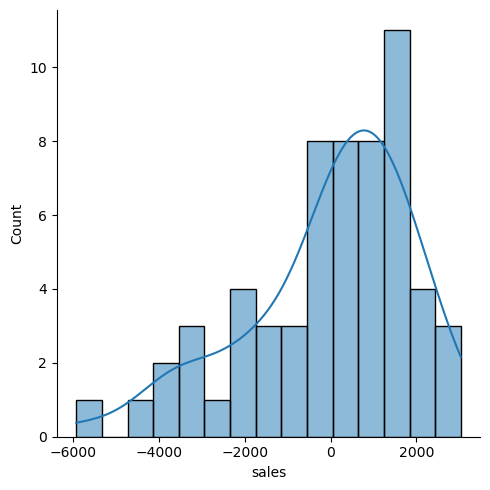

In [40]:
# Draw the histogram plot on residuals1 Vs count by using seaborn.diplot().

# Draw the histogram plot.
sns.displot(residuals1, bins=15, kde=True)

# Display all figures.
plt.show()

<b> By looking at the plots we can see that the residuals are not normally distributed for the number of test points, its showing left skewed distribution.

#### c) Equal Variance of Errors (Homoscadesicity) :
- Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

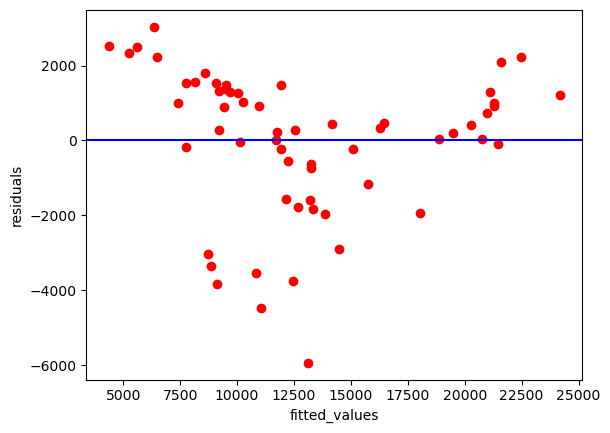

In [41]:
# Draw the scatter plot on residuals1 Vs test_prediction1 by using scatter().

# Draw the scatter plot.
plt.scatter(test_prediction1, residuals1, c='r')

# Add a horizontal line across the Axes where y=0.
plt.axhline(y=0, color='blue')

# Set the x-label name.
plt.xlabel("fitted_values")

# Set the y-label name.
plt.ylabel("residuals")

# Display all figures.
plt.show()

<b> from the above plot, we can see that the residuals are non-constant variance, it is known as heteroscedasticity.

#### d) Autocorrelation or Variables Significance (Independence of Errors) :
- Checking the residuals are independent.or not. Let's check this based on Ordinary Least Squares (OLS) Using StatsModels.

In [42]:
# import the ols class from statsmodels.formula.api library
from statsmodels.formula.api import ols

# create our formula and pass it through to the OLS methods 
# pass the data=df and use fit() to fit the linear model.
# Store the result in "model12" object.
model12 = ols(formula="sales ~ TV + radio", data=df).fit()

# evaluate how the model performed and print it.
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           4.83e-98
Time:                        14:54:56   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3541.
Df Residuals:                     197   BIC:                             3551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2921.0999    294.490      9.919      0.000    2340.343    3501.857
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b> In the above, we can see that P>|t| (probability of TV and radio) is less than the confidence level, i.e. p-value (0.000) < confidence level (0.05), hence p low Null go reject the Ho (Null Hypothesis). So the residuals are independent.



<b> After analyzing the model1 and model2, we conclude that this dataset is not suitable for the multiple regression because here we got best train and test accuracies but assumptions got violated. 